In [1]:
%matplotlib inline

import os
import sys
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tau = 20
a = 0.2
u = 1/0.2
D = 2
T = 60000
c1 = 1000       #!!
c2 = 0.5*c1     #!!
c3 = 1000       #!!
Lambda = 0.1

In [3]:
def L(M,H):
    eps = 1e-12
    tau = 20
    a = 0.2
    u = 1/0.2
    D = 2
    T = 60000
    c1 = 1000       #!!
    c2 = 0.5*c1     #!!
    c3 = 1000       #!!
    Lambda = 0.1
    gama = H

    p1 = 1/(tau)*(tau-a*H-D-H/u*(1-np.exp(-u/H*(tau-a*H-D))))
    p2 = 1-np.exp(-u/H*(tau-a*H-D))

    K = Lambda*tau*p1 + Lambda*np.abs(T/M-tau)*p2
    return (c1*(H-1)**2+c2*H*H/(K+eps)+c3)/(M*H+gama)

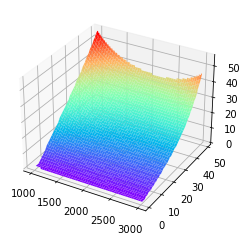

In [4]:
fig = plt.figure()  #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')

#定义三维数据
M = np.arange(1000,3000,1)
H = np.arange(1,50,1)
M, H = np.meshgrid(M, H)
Z = np.zeros_like(M)
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        Z[i][j] = L(M[i][j],H[i][j])
        flag = (tau > a*H[i][j]+D) and (T/M[i][j] > a*H[i][j]+D)
        Z[i][j] = Z[i][j] if flag else 10


#作图
ax3.plot_surface(M,H,Z,cmap='rainbow')
#ax3.contour(X,Y,Z, zdim='z',offset=-2，cmap='rainbow')   #等高线图，要设置offset，为Z的最小值
plt.show()